<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
# import json as js
# from js import fetch
# import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
# boston_df=pd.read_csv(boston_url)
boston_df=pd.read_csv(URL)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


For the "Median value of owner-occupied homes" provide a boxplot

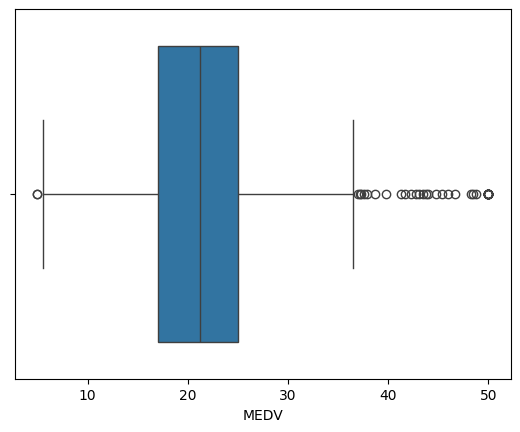

In [7]:
ax = sns.boxplot(x="MEDV", data=boston_df)

Provide a  bar plot for the Charles river variable

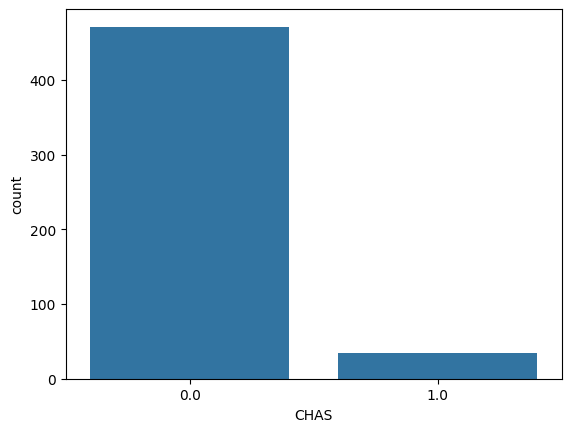

In [8]:
ax = sns.countplot(x="CHAS",data=boston_df)

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

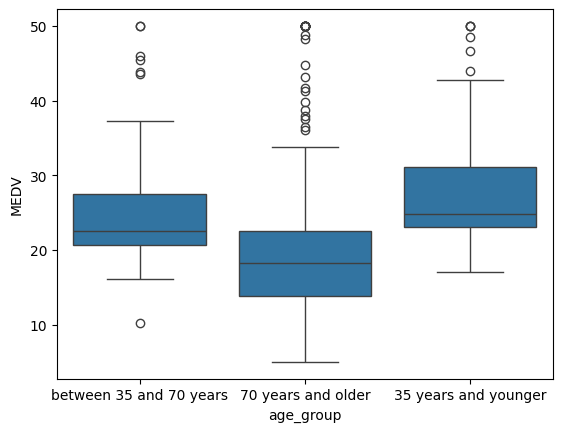

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax=sns.boxplot(data=boston_df,x="age_group",y="MEDV")

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


Answer : From scatterplot below , both variable shows correlation, positive upward linear relationship between NOX (nitric oxide concentration) & (non retail business acres per town)


<Axes: xlabel='INDUS', ylabel='NOX'>

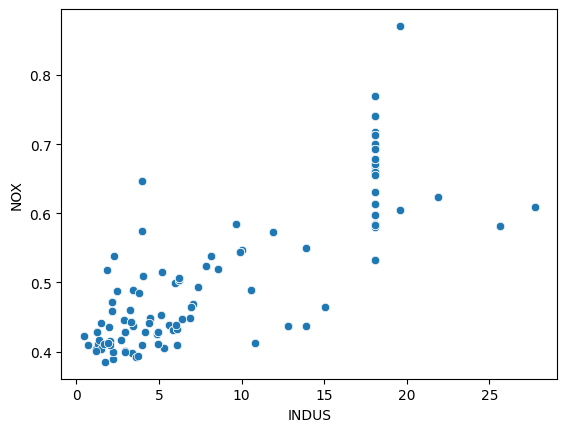

In [10]:
sns.scatterplot(data=boston_df,x="INDUS",y="NOX")

Create a histogram for the pupil to teacher ratio variable

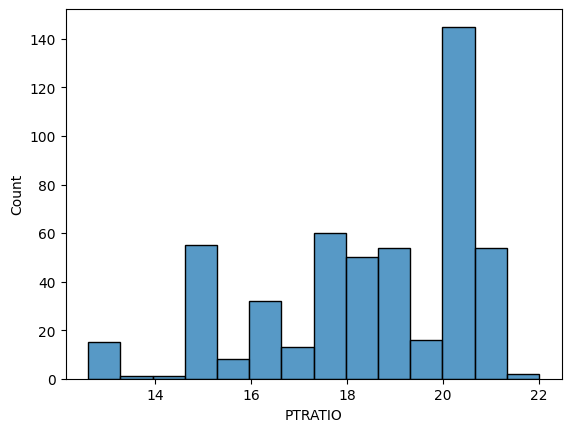

In [11]:
ax=sns.histplot(data=boston_df,x="PTRATIO")

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



We will state the null hypothesis:

* $H_0: µ_1 = µ_2$ (Charles river bound has no effect on median values of houses)
* $H_1: µ_1 ≠ µ_2$ (Charles river bound has statistical effect on median values of house )

where alpha = 0.05

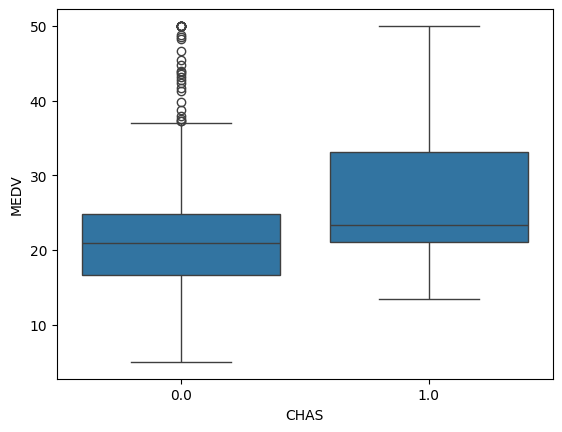

In [12]:
ax = sns.boxplot(x="CHAS",y="MEDV",data=boston_df)

In [13]:
boston_df.loc[(boston_df['CHAS'] <= 0.5), 'CHASB'] = '0.0'
boston_df.loc[(boston_df['CHAS'] > 0.5), 'CHASB'] = '1.0'


In [14]:
scipy.stats.levene(boston_df[boston_df['CHASB'] == '1.0']['MEDV'],
                   boston_df[boston_df['CHASB'] == '0.0']['MEDV'], center='mean')

# since the p-value is less than 0.05 , we can reject the null hypothesis that the variance is equal , and there is statistical difference between Charles river bound for median value of the houses

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHASB'] == '1.0']['MEDV'],
                   boston_df[boston_df['CHASB'] == '0.0']['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values of houses based on CHarles river bound

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

We will state the null hypothesis:

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ

where alpha = 0.05

In [17]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

pvalue is greater than 0.05, fail to reject null hypothesis ,and the variance betwen the 3 group is equal

continue test statistic by breaking age group to 3 categories :

In [19]:
thirty_lower_medv= boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_medv= boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'] 
seventy_above_med = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [20]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_lower_medv, thirtyfive_seventy_medv, seventy_above_med)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis,  that there is significant statistical difference between means of three groups

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

null hypothesis - there is no correlation between NOX & INDUS (nitric oxide conc vs proportion of non retail business acre per town)
alpha = 0.05

In [21]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

**Conclusion **since the p value is less than 0.05, we reject the null hypothesis, and there is a correlation between the 2 variables 
the pearson coefficient of 0.76 suggested strong correlation   

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [24]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        16:01:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

observation : p value of less than 0.05, null hypothesis is rejected, where two variables are associated , where the distance impact the median values of houses , correlation of coefficients  is sqrt of R-square 0.062 ---> 0.25

**conclusion** : with each increase of weighted distance to workplace , 1.09 increase in median values of houses